In [1]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import KFold
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
data=pd.read_csv("C://Users//Rahul//Desktop//excelR submission//KNN//KNN excelR Qestion//Zoo.csv")
data

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [4]:
data.shape

(101, 18)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [6]:
data.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [9]:
X = data.drop(columns = ['type','animal name'])
y = data['type']

In [10]:
X

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [11]:
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [12]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y, test_size= 0.33)

In [13]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [14]:
y_pred = knn.predict(x_test)

In [15]:
knn.score(x_train,y_train)

0.9552238805970149

In [16]:
print("The accuracy score is : ", accuracy_score(y_test,y_pred))

The accuracy score is :  0.7941176470588235


In [17]:
param_grid = { 'algorithm' : ['ball_tree', 'kd_tree', 'brute'],
               'leaf_size' : [18,20,25,27,30,32,34],
               'n_neighbors' : [3,5,7,9,10,11,12,13]
              }

In [18]:
gridsearch = GridSearchCV(knn, param_grid,verbose=3)

In [19]:
gridsearch.fit(x_train,y_train)

Fitting 5 folds for each of 168 candidates, totalling 840 fits
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=3, score=0.929, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=3, score=0.929, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=3, score=0.846, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=3, score=0.923, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=3, score=1.000, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=5 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=5, score=0.929, total=   0.0s
[CV] algorith

C:\Users\Rahul\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=5, score=0.846, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=5 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=5, score=0.923, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=5 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=5, score=1.000, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=7 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=7, score=0.786, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=7 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=7, score=0.857, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=7 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=7, score=0.846, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=7 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=7, score=1.000, total= 

[CV]  algorithm=ball_tree, leaf_size=25, n_neighbors=5, score=0.923, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=25, n_neighbors=5 ................
[CV]  algorithm=ball_tree, leaf_size=25, n_neighbors=5, score=1.000, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=25, n_neighbors=7 ................
[CV]  algorithm=ball_tree, leaf_size=25, n_neighbors=7, score=0.786, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=25, n_neighbors=7 ................
[CV]  algorithm=ball_tree, leaf_size=25, n_neighbors=7, score=0.857, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=25, n_neighbors=7 ................
[CV]  algorithm=ball_tree, leaf_size=25, n_neighbors=7, score=0.846, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=25, n_neighbors=7 ................
[CV]  algorithm=ball_tree, leaf_size=25, n_neighbors=7, score=1.000, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=25, n_neighbors=7 ................
[CV]  algorithm=ball_tree, leaf_size=25, n_neighbors=7, score=1.000, total= 

[CV]  algorithm=ball_tree, leaf_size=27, n_neighbors=10, score=0.923, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=27, n_neighbors=10 ...............
[CV]  algorithm=ball_tree, leaf_size=27, n_neighbors=10, score=0.923, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=27, n_neighbors=11 ...............
[CV]  algorithm=ball_tree, leaf_size=27, n_neighbors=11, score=0.929, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=27, n_neighbors=11 ...............
[CV]  algorithm=ball_tree, leaf_size=27, n_neighbors=11, score=0.857, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=27, n_neighbors=11 ...............
[CV]  algorithm=ball_tree, leaf_size=27, n_neighbors=11, score=0.769, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=27, n_neighbors=11 ...............
[CV]  algorithm=ball_tree, leaf_size=27, n_neighbors=11, score=0.846, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=27, n_neighbors=11 ...............
[CV]  algorithm=ball_tree, leaf_size=27, n_neighbors=11, score=0.923, 

[CV] algorithm=ball_tree, leaf_size=32, n_neighbors=9 ................
[CV]  algorithm=ball_tree, leaf_size=32, n_neighbors=9, score=0.846, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=32, n_neighbors=9 ................
[CV]  algorithm=ball_tree, leaf_size=32, n_neighbors=9, score=0.923, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=32, n_neighbors=9 ................
[CV]  algorithm=ball_tree, leaf_size=32, n_neighbors=9, score=0.923, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=32, n_neighbors=10 ...............
[CV]  algorithm=ball_tree, leaf_size=32, n_neighbors=10, score=0.929, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=32, n_neighbors=10 ...............
[CV]  algorithm=ball_tree, leaf_size=32, n_neighbors=10, score=0.857, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=32, n_neighbors=10 ...............
[CV]  algorithm=ball_tree, leaf_size=32, n_neighbors=10, score=0.846, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=32, n_neighbors=10 ...............
[C

[CV]  algorithm=kd_tree, leaf_size=18, n_neighbors=7, score=0.846, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=18, n_neighbors=7 ..................
[CV]  algorithm=kd_tree, leaf_size=18, n_neighbors=7, score=1.000, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=18, n_neighbors=7 ..................
[CV]  algorithm=kd_tree, leaf_size=18, n_neighbors=7, score=1.000, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=18, n_neighbors=9 ..................
[CV]  algorithm=kd_tree, leaf_size=18, n_neighbors=9, score=0.857, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=18, n_neighbors=9 ..................
[CV]  algorithm=kd_tree, leaf_size=18, n_neighbors=9, score=0.857, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=18, n_neighbors=9 ..................
[CV]  algorithm=kd_tree, leaf_size=18, n_neighbors=9, score=0.846, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=18, n_neighbors=9 ..................
[CV]  algorithm=kd_tree, leaf_size=18, n_neighbors=9, score=0.923, total=   0.0s
[CV] al

[CV]  algorithm=kd_tree, leaf_size=25, n_neighbors=3, score=1.000, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=25, n_neighbors=5 ..................
[CV]  algorithm=kd_tree, leaf_size=25, n_neighbors=5, score=0.929, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=25, n_neighbors=5 ..................
[CV]  algorithm=kd_tree, leaf_size=25, n_neighbors=5, score=0.929, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=25, n_neighbors=5 ..................
[CV]  algorithm=kd_tree, leaf_size=25, n_neighbors=5, score=0.846, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=25, n_neighbors=5 ..................
[CV]  algorithm=kd_tree, leaf_size=25, n_neighbors=5, score=0.923, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=25, n_neighbors=5 ..................
[CV]  algorithm=kd_tree, leaf_size=25, n_neighbors=5, score=1.000, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=25, n_neighbors=7 ..................
[CV]  algorithm=kd_tree, leaf_size=25, n_neighbors=7, score=0.786, total=   0.0s
[CV] al

[CV]  algorithm=kd_tree, leaf_size=27, n_neighbors=13, score=0.923, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=3 ..................
[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=3, score=0.929, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=3 ..................
[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=3, score=0.929, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=3 ..................
[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=3, score=0.846, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=3 ..................
[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=3, score=0.923, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=3 ..................
[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=3, score=1.000, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=5 ..................
[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=5, score=0.929, total=   0.0s
[CV] a

[CV]  algorithm=kd_tree, leaf_size=32, n_neighbors=11, score=0.923, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=32, n_neighbors=12 .................
[CV]  algorithm=kd_tree, leaf_size=32, n_neighbors=12, score=0.929, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=32, n_neighbors=12 .................
[CV]  algorithm=kd_tree, leaf_size=32, n_neighbors=12, score=0.857, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=32, n_neighbors=12 .................
[CV]  algorithm=kd_tree, leaf_size=32, n_neighbors=12, score=0.769, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=32, n_neighbors=12 .................
[CV]  algorithm=kd_tree, leaf_size=32, n_neighbors=12, score=0.846, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=32, n_neighbors=12 .................
[CV]  algorithm=kd_tree, leaf_size=32, n_neighbors=12, score=0.923, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=32, n_neighbors=13 .................
[CV]  algorithm=kd_tree, leaf_size=32, n_neighbors=13, score=0.857, total=   0.0s


[CV]  algorithm=brute, leaf_size=18, n_neighbors=11, score=0.923, total=   0.0s
[CV] algorithm=brute, leaf_size=18, n_neighbors=12 ...................
[CV]  algorithm=brute, leaf_size=18, n_neighbors=12, score=0.929, total=   0.0s
[CV] algorithm=brute, leaf_size=18, n_neighbors=12 ...................
[CV]  algorithm=brute, leaf_size=18, n_neighbors=12, score=0.857, total=   0.0s
[CV] algorithm=brute, leaf_size=18, n_neighbors=12 ...................
[CV]  algorithm=brute, leaf_size=18, n_neighbors=12, score=0.769, total=   0.0s
[CV] algorithm=brute, leaf_size=18, n_neighbors=12 ...................
[CV]  algorithm=brute, leaf_size=18, n_neighbors=12, score=0.846, total=   0.0s
[CV] algorithm=brute, leaf_size=18, n_neighbors=12 ...................
[CV]  algorithm=brute, leaf_size=18, n_neighbors=12, score=0.923, total=   0.0s
[CV] algorithm=brute, leaf_size=18, n_neighbors=13 ...................
[CV]  algorithm=brute, leaf_size=18, n_neighbors=13, score=0.857, total=   0.0s
[CV] algorithm

[CV]  algorithm=brute, leaf_size=25, n_neighbors=11, score=0.846, total=   0.0s
[CV] algorithm=brute, leaf_size=25, n_neighbors=11 ...................
[CV]  algorithm=brute, leaf_size=25, n_neighbors=11, score=0.923, total=   0.0s
[CV] algorithm=brute, leaf_size=25, n_neighbors=12 ...................
[CV]  algorithm=brute, leaf_size=25, n_neighbors=12, score=0.929, total=   0.0s
[CV] algorithm=brute, leaf_size=25, n_neighbors=12 ...................
[CV]  algorithm=brute, leaf_size=25, n_neighbors=12, score=0.857, total=   0.0s
[CV] algorithm=brute, leaf_size=25, n_neighbors=12 ...................
[CV]  algorithm=brute, leaf_size=25, n_neighbors=12, score=0.769, total=   0.0s
[CV] algorithm=brute, leaf_size=25, n_neighbors=12 ...................
[CV]  algorithm=brute, leaf_size=25, n_neighbors=12, score=0.846, total=   0.0s
[CV] algorithm=brute, leaf_size=25, n_neighbors=12 ...................
[CV]  algorithm=brute, leaf_size=25, n_neighbors=12, score=0.923, total=   0.0s
[CV] algorithm

[CV]  algorithm=brute, leaf_size=30, n_neighbors=10, score=0.846, total=   0.0s
[CV] algorithm=brute, leaf_size=30, n_neighbors=10 ...................
[CV]  algorithm=brute, leaf_size=30, n_neighbors=10, score=0.923, total=   0.0s
[CV] algorithm=brute, leaf_size=30, n_neighbors=10 ...................
[CV]  algorithm=brute, leaf_size=30, n_neighbors=10, score=0.923, total=   0.0s
[CV] algorithm=brute, leaf_size=30, n_neighbors=11 ...................
[CV]  algorithm=brute, leaf_size=30, n_neighbors=11, score=0.929, total=   0.0s
[CV] algorithm=brute, leaf_size=30, n_neighbors=11 ...................
[CV]  algorithm=brute, leaf_size=30, n_neighbors=11, score=0.857, total=   0.0s
[CV] algorithm=brute, leaf_size=30, n_neighbors=11 ...................
[CV]  algorithm=brute, leaf_size=30, n_neighbors=11, score=0.769, total=   0.0s
[CV] algorithm=brute, leaf_size=30, n_neighbors=11 ...................
[CV]  algorithm=brute, leaf_size=30, n_neighbors=11, score=0.846, total=   0.0s
[CV] algorithm

[CV]  algorithm=brute, leaf_size=34, n_neighbors=7, score=0.786, total=   0.0s
[CV] algorithm=brute, leaf_size=34, n_neighbors=7 ....................
[CV]  algorithm=brute, leaf_size=34, n_neighbors=7, score=0.857, total=   0.0s
[CV] algorithm=brute, leaf_size=34, n_neighbors=7 ....................
[CV]  algorithm=brute, leaf_size=34, n_neighbors=7, score=0.846, total=   0.0s
[CV] algorithm=brute, leaf_size=34, n_neighbors=7 ....................
[CV]  algorithm=brute, leaf_size=34, n_neighbors=7, score=1.000, total=   0.0s
[CV] algorithm=brute, leaf_size=34, n_neighbors=7 ....................
[CV]  algorithm=brute, leaf_size=34, n_neighbors=7, score=1.000, total=   0.0s
[CV] algorithm=brute, leaf_size=34, n_neighbors=9 ....................
[CV]  algorithm=brute, leaf_size=34, n_neighbors=9, score=0.857, total=   0.0s
[CV] algorithm=brute, leaf_size=34, n_neighbors=9 ....................
[CV]  algorithm=brute, leaf_size=34, n_neighbors=9, score=0.857, total=   0.0s
[CV] algorithm=brute,

[Parallel(n_jobs=1)]: Done 840 out of 840 | elapsed:    4.9s finished


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [18, 20, 25, 27, 30, 32, 34],
                         'n_neighbors': [3, 5, 7, 9, 10, 11, 12, 13]},
             verbose=3)

In [20]:
gridsearch.best_params_

{'algorithm': 'ball_tree', 'leaf_size': 18, 'n_neighbors': 3}

In [21]:
knn = KNeighborsClassifier(algorithm = 'ball_tree', leaf_size =18, n_neighbors =3)

In [22]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='ball_tree', leaf_size=18, n_neighbors=3)

In [23]:
knn.score(x_train,y_train)

0.9701492537313433

In [24]:
knn.score(x_train,y_train)

0.9701492537313433

In [25]:
knn.score(x_test,y_test)

0.8823529411764706

In [26]:
kfold = KFold(n_splits=12,random_state= 42)
kfold.get_n_splits(X_scaled)

C:\Users\Rahul\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


12

In [27]:
from statistics import mean
knn = KNeighborsClassifier(algorithm = 'ball_tree', leaf_size =18, n_neighbors =3)
cnt =0
count=[]
train_score =[]
test_score = []

for train_index,test_index in kfold.split(X_scaled):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index] # our scaled data is an array so it can work on x[value]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index] # y is a dataframe so we have to use "iloc" to retreive data
    knn.fit(X_train,y_train)
    train_score_ = knn.score(X_train,y_train)
    test_score_ =  knn.score(X_test,y_test)
    cnt+=1
    count.append(cnt)
    train_score.append(train_score_)
    test_score.append(test_score_)
    
    print("for k = ", cnt)
    print("train_score is :  ", train_score_, "and test score is :  ", test_score_)
print("************************************************")
print("************************************************")
print("Average train score is :  ", mean(train_score))
print("Average test score is :  ", mean(test_score))

for k =  1
train_score is :   0.9782608695652174 and test score is :   1.0
for k =  2
train_score is :   0.9782608695652174 and test score is :   1.0
for k =  3
train_score is :   0.967391304347826 and test score is :   1.0
for k =  4
train_score is :   0.9782608695652174 and test score is :   1.0
for k =  5
train_score is :   0.9782608695652174 and test score is :   1.0
for k =  6
train_score is :   0.978494623655914 and test score is :   0.875
for k =  7
train_score is :   0.989247311827957 and test score is :   1.0
for k =  8
train_score is :   0.978494623655914 and test score is :   1.0
for k =  9
train_score is :   1.0 and test score is :   0.875
for k =  10
train_score is :   0.956989247311828 and test score is :   0.75
for k =  11
train_score is :   0.978494623655914 and test score is :   0.75
for k =  12
train_score is :   0.967741935483871 and test score is :   0.875
************************************************
************************************************
Average train

([<matplotlib.axis.YTick at 0x2365513d2e0>,
 <a list of 7 Text major ticklabel objects>)

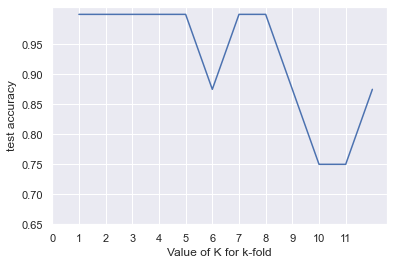

In [28]:
plt.plot(count,test_score)
plt.xlabel('Value of K for k-fold')
plt.ylabel('test accuracy')
plt.xticks(np.arange(0, 12, 1)) 
plt.yticks(np.arange(0.65, 1, 0.05)) 